First we will download the dataset from torchvision.  SVHN is a dataset which stands for Street View House Numbers
 * We also need to import some additional libraries, torch.nn is the nueral network.
 * transforms is what transforms the picture into data and then we can use that data to import into a tensor
 * DataLoader is what allows us to import the data.

In [1]:
from torchvision.datasets import SVHN
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn
import torch.optim as optim
import matplotlib.pyplot as plt


First we will preprocess the data:
* First we transform the data into a tensor, while normalizing the type of data that we will have
* Second step is setting up a training dataset and test dataset
  

In [3]:
normalizesvhn = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean = [.5], std = [.5])])

In [5]:
trainingdata = SVHN(root = "./data", split="train", download = True,transform = normalizesvhn)
testdata = SVHN(root = "./data", split="test", download = True, transform = normalizesvhn)

In [7]:
training = DataLoader(trainingdata, batch_size = 160, shuffle = True)
test = DataLoader(testdata, batch_size = 40, shuffle = False)

How to look at a tensor

In [9]:
trainingtensor = iter(training)
images, labels= next(trainingtensor)

print("Tensor Values", images[:5])


Tensor Values tensor([[[[ 0.3490,  0.3098,  0.2863,  ...,  0.3176,  0.3333,  0.3255],
          [ 0.3412,  0.2941,  0.2706,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3255,  0.2784,  0.2941,  ..., -0.0980,  0.1922,  0.2627],
          ...,
          [ 0.2706,  0.2627,  0.2549,  ...,  0.0039,  0.2157,  0.2471],
          [ 0.3176,  0.2863,  0.2627,  ...,  0.0275,  0.2549,  0.2784],
          [ 0.2784,  0.2706,  0.2627,  ...,  0.0980,  0.2549,  0.2784]],

         [[ 0.3176,  0.2863,  0.2941,  ...,  0.3020,  0.3020,  0.3255],
          [ 0.3176,  0.3020,  0.3020,  ...,  0.2392,  0.2392,  0.2784],
          [ 0.3020,  0.2784,  0.2706,  ..., -0.0510,  0.2000,  0.2706],
          ...,
          [ 0.2314,  0.2235,  0.2235,  ...,  0.0039,  0.1765,  0.2157],
          [ 0.2706,  0.2627,  0.2549,  ..., -0.0039,  0.1843,  0.2235],
          [ 0.2471,  0.2549,  0.2471,  ...,  0.0510,  0.1922,  0.2392]],

         [[ 0.2235,  0.2078,  0.1686,  ...,  0.1922,  0.1765,  0.2157],
          [ 0.19

In [11]:
print("Shape of first 5 Images:", images[:5].shape)
print("Shape of first 5 Labels:", labels[:5].shape)

Shape of first 5 Images: torch.Size([5, 3, 32, 32])
Shape of first 5 Labels: torch.Size([5])


These numbers don't look like a picture, how could we see the actual image?


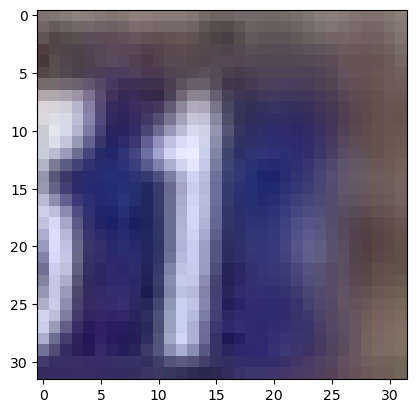

In [13]:
picture = images[2]
picture = picture.permute(1,2,0)
picture = picture * .5 + .5
plt.imshow(picture)



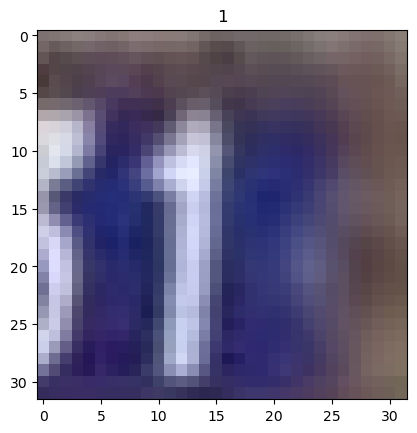

In [15]:
plt.imshow(picture)
plt.title(labels[2].item());

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81960785..1.0].


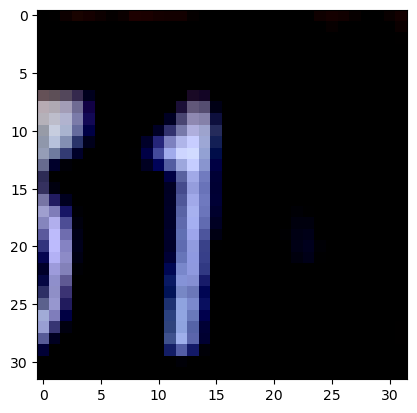

In [19]:
picture = images[2]
picture = picture.permute(1,2,0)
picture = picture 
plt.imshow(picture)

In [21]:
class digits(torch.nn.Module):
    def __init__(self):
        super(digits, self).__init__()
        self.conv = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3,stride = 1 , padding = 1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.fc = torch.nn.Sequential(torch.nn.Linear(32 * 16 * 16, 128), torch.nn.ReLU(), torch.nn.Linear(128,10))
        
    def forward(self,x):
        x = self.conv(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        return x

In [23]:
model = digits()

In [25]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [27]:
numberofpasses = 2 #Update in final code to higher number

for passes in range(numberofpasses):
    model.train()
    total_loss = 0

    for inputs, labels in training:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

print(f"Loss: {total_loss/len(training)}")  


Loss: 0.6254795122745256


Evaluation

In [29]:
model.eval()

correctpredictions = 0
totals = 0

with torch.no_grad():
    for images, labels in test:
        output = model(images)
        _,predicted = torch.max(output,1)
        totals += labels.size(0)
        correctpredictions += (predicted == labels).sum().item()

print(f"Correctly Predicted: {(correctpredictions/totals)*100:.2f}%")



Correctly Predicited: 81.39%


let's see some examples of what we predicted and what we should've seen

In [37]:
images, labels = next(iter(test))
visualization = model(images)
_, predictions = torch.max(visualization, 1)

for loop in range(20):
    print(f"Dataset Label: {labels[loop].item()} and Prediction: predictions: {predictions[loop].item()}")

Dataset Label: 5 and Prediction: predictions: 5
Dataset Label: 2 and Prediction: predictions: 2
Dataset Label: 1 and Prediction: predictions: 1
Dataset Label: 0 and Prediction: predictions: 6
Dataset Label: 6 and Prediction: predictions: 6
Dataset Label: 1 and Prediction: predictions: 1
Dataset Label: 9 and Prediction: predictions: 9
Dataset Label: 1 and Prediction: predictions: 1
Dataset Label: 1 and Prediction: predictions: 1
Dataset Label: 8 and Prediction: predictions: 8
Dataset Label: 3 and Prediction: predictions: 9
Dataset Label: 6 and Prediction: predictions: 8
Dataset Label: 5 and Prediction: predictions: 5
Dataset Label: 1 and Prediction: predictions: 1
Dataset Label: 4 and Prediction: predictions: 4
Dataset Label: 4 and Prediction: predictions: 4
Dataset Label: 1 and Prediction: predictions: 1
Dataset Label: 6 and Prediction: predictions: 6
Dataset Label: 3 and Prediction: predictions: 3
Dataset Label: 4 and Prediction: predictions: 4


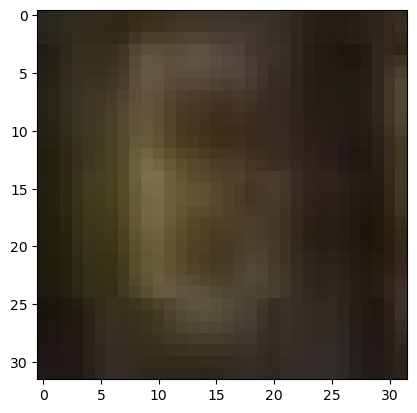

In [47]:
testimages, testlabels = next(iter(test))
plt.imshow(testimages[11].permute(1, 2, 0)* .5 + .5)


In [49]:
print(testlabels[11].item())

6
